<a href="https://colab.research.google.com/github/LOGITHNATHAN/Multiple-Disease-Prediction/blob/main/Multiple_disease_prediction_system_kidney_diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df_kidney = pd.read_csv(r'/content/kidney_disease - kidney_disease.csv')

In [4]:
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df_kidney.shape

(400, 26)

In [6]:
df_kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
# To see what are the column names in our dataset
print(df_kidney.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [9]:
df_kidney['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [10]:
df_kidney['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [11]:
df_kidney['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
df_kidney['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [13]:
df_kidney['pe'].unique()

array(['no', 'yes', nan], dtype=object)

In [14]:
df_kidney['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [15]:
# Mapping the text to 1/0 and cleaning the dataset
df_kidney[['htn','dm','cad','pe','ane']] = df_kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0, '':np.nan})
df_kidney[['rbc','pc']] = df_kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0, '':np.nan})
df_kidney[['pcc','ba']] = df_kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0, '':np.nan})
df_kidney[['appet']] = df_kidney[['appet']].replace(to_replace={'good':1,'poor':0, '':np.nan})
df_kidney['classification'] = df_kidney['classification'].replace(to_replace={'ckd':1.0,'notckd':0.0, '':np.nan})

df_kidney.rename(columns={'classification':'class'},inplace=True)
df_kidney.drop('id',axis=1,inplace=True)

/tmp/ipython-input-3785424298.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kidney[['htn','dm','cad','pe','ane']] = df_kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0, '':np.nan})
/tmp/ipython-input-3785424298.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kidney[['rbc','pc']] = df_kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0, '':np.nan})
/tmp/ipython-input-3785424298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

In [16]:
df_kidney['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [17]:
df_kidney['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '?', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [18]:
df_kidney['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [19]:
df_kidney['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [20]:
# columns that have numbers stored as text , converting them to numerics
cols_to_convert = ['pcv', 'wc', 'rc']
df_kidney[cols_to_convert] = df_kidney[cols_to_convert].apply(pd.to_numeric, errors='coerce')  #If a value can’t be converted to a number, change it to NaN

In [21]:
display(df_kidney)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# This shows number of rows with missing data
display(df_kidney.isnull().sum(axis = 1))


,0
0,3
1,5
2,3
3,0
4,2
...,...
395,0
396,0
397,0
398,0


In [23]:
# This helps to count how many NaN are there in each column
len(df_kidney)-df_kidney.count()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


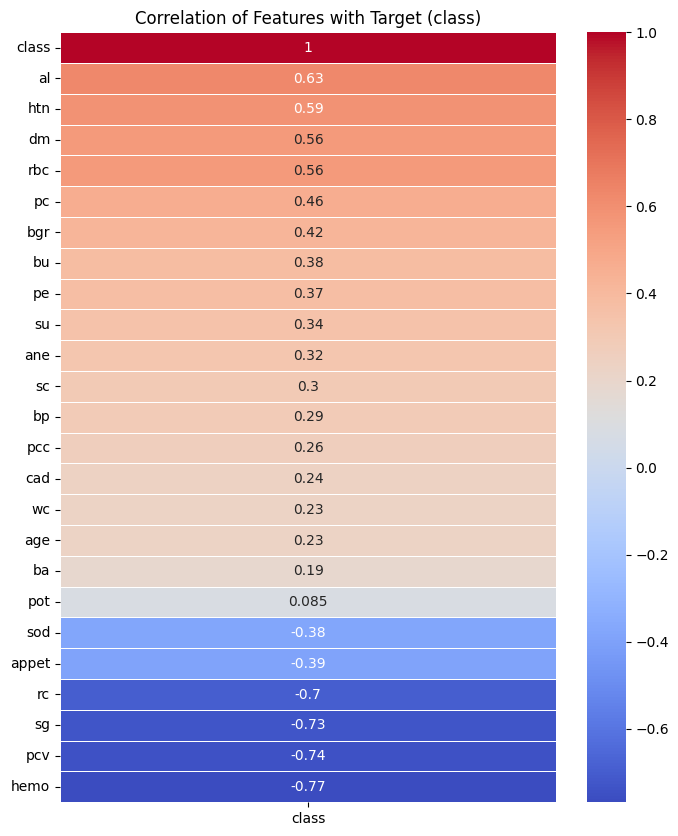

In [24]:
# Compute correlation matrix
corr_matrix = df_kidney.corr()

# 5. Plot heatmap showing correlation of all features with the target only
plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix[['class']].sort_values(by='class', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation of Features with Target (class)")
plt.show()


In [25]:
# Impute using mode (categorical binary feature)
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in categorical_cols:
    df_kidney[col] = df_kidney[col].fillna(df_kidney[col].mode()[0])

# Impute using median for numeric columns (less affected by outliers)
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in numerical_cols:
    df_kidney[col] = df_kidney[col].fillna(df_kidney[col].median())

# Drop 'rc' due to high missing rate and low correlation
df_kidney.drop(columns=['rc'], inplace=True)

# Confirm all missing values are handled
print(df_kidney.isnull().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [26]:
print(df_kidney.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  htn     400 non-null    float64
 18  dm      400 non-null    float64
 19  cad     400 non-null    float64
 20  appet   400 non-null    float64
 21  pe      400 non-null    float64
 22  an

In [27]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)
# Display the first 5 rows
df_kidney.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,8000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [28]:
df_kidney['class'].value_counts()   # 'ckd':1.0,'notckd':0.0

,count
class,
1.0,250
0.0,150


In [29]:
df_kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class'],
      dtype='object')

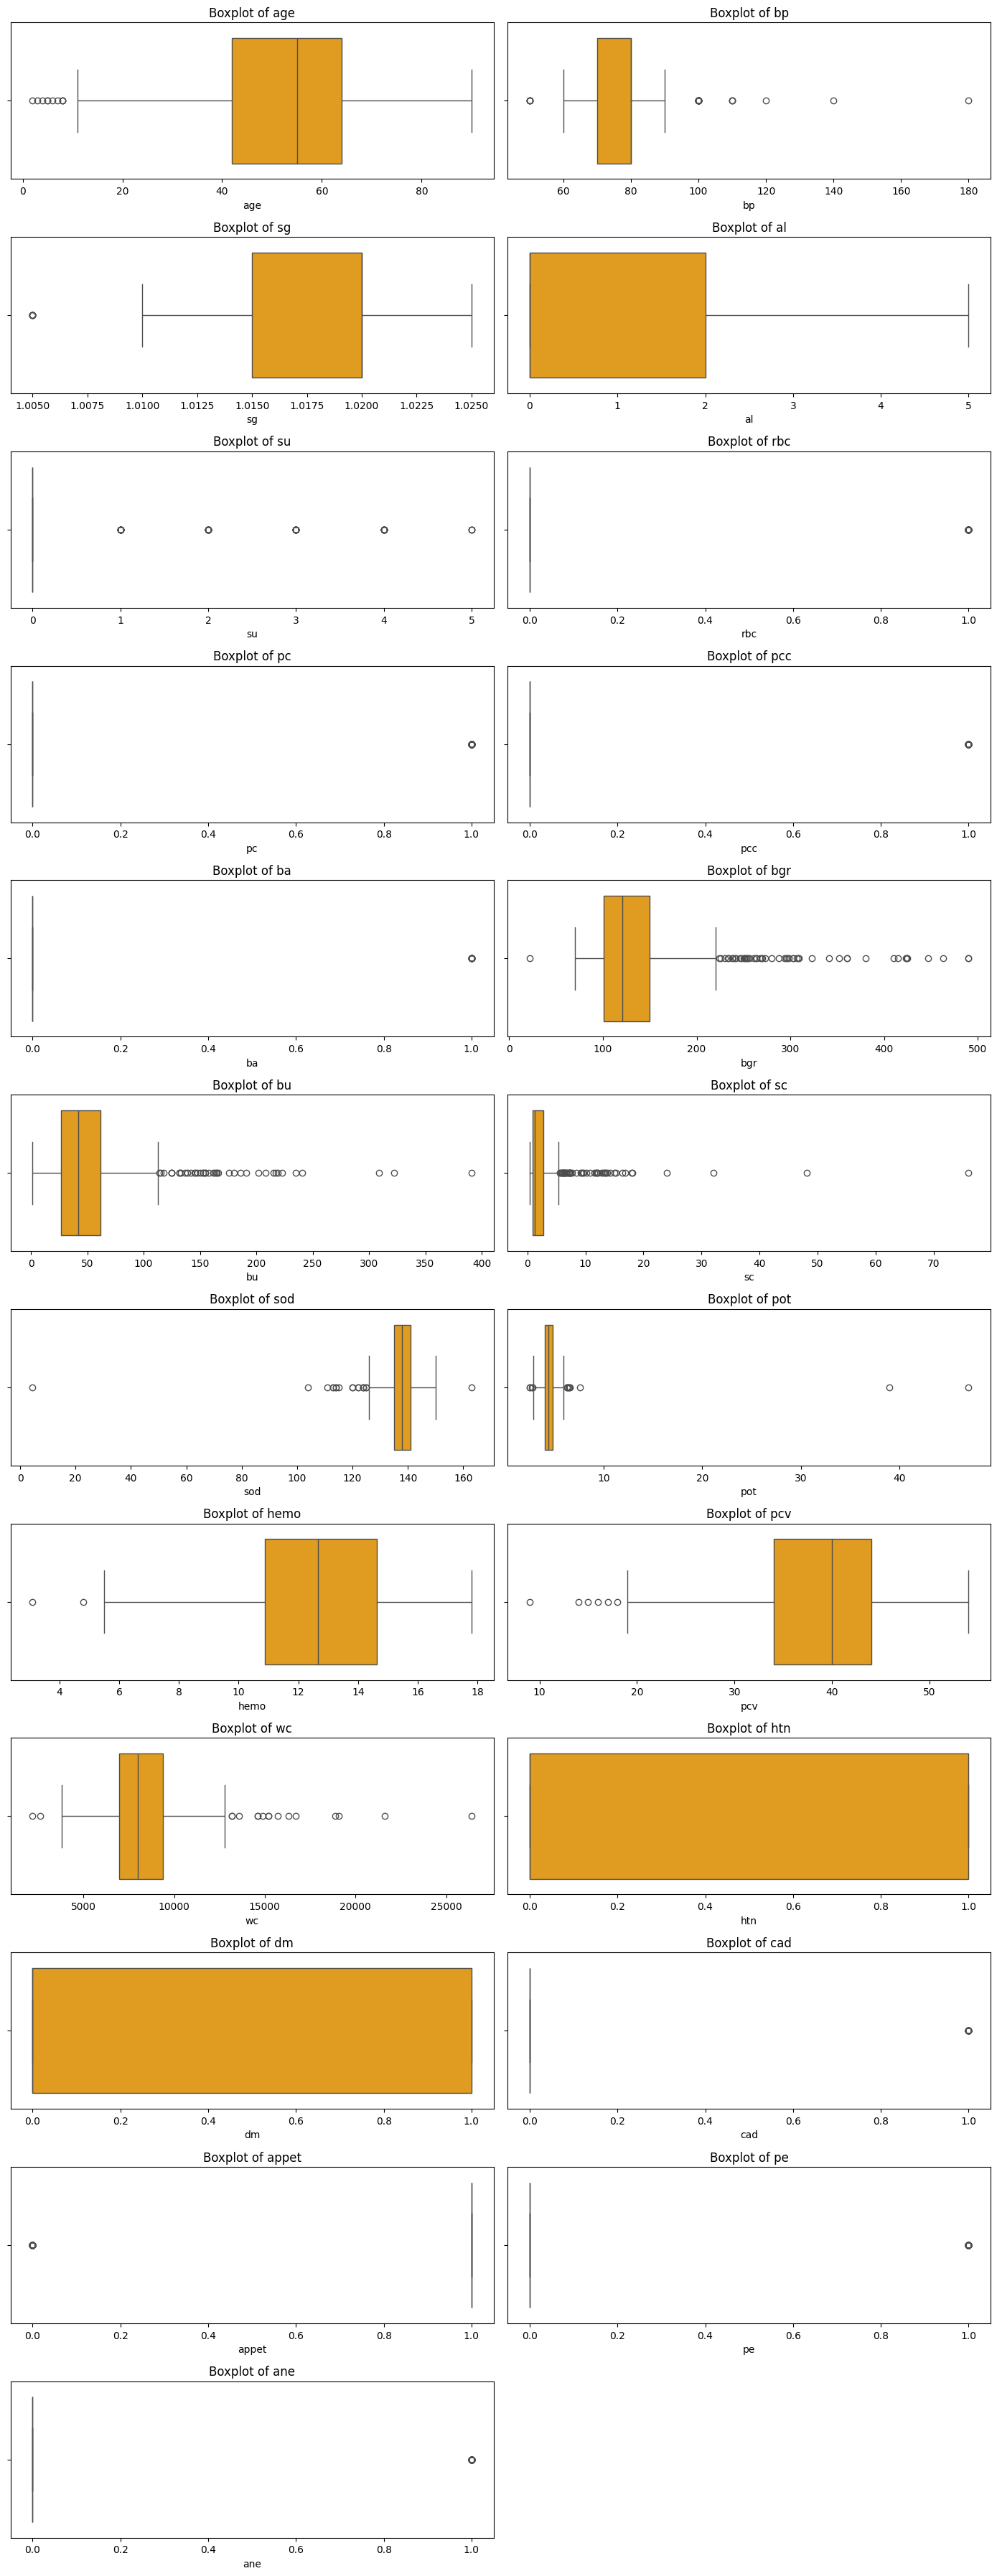

In [30]:
# Filter numeric columns (excluding 'Dataset')
numeric_cols = [col for col in df_kidney.columns if df_kidney[col].dtype != 'object' and col != 'class']

# Plot two boxplots per row
plt.figure(figsize=(14, 3 * ((len(numeric_cols) + 1) // 2)))  # Adjust height based on number of plots

for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df_kidney[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [31]:
# Binary features (like rbc, pc, htn) show outliers because one class is rare — not an error.
# Medical features like bgr, sc, bu, pot show high outliers that may indicate severe disease.
# Random forest are not sensitive to extreme values

In [32]:
# Separate features (X) and target (y)
X = df_kidney.drop('class', axis=1)
y = df_kidney['class']

In [33]:
# Split into training and testing sets (80/20 split with stratification)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
y_train.value_counts()    # 'ckd':1.0,'notckd':0.0

,count
class,
1.0,200
0.0,120


In [35]:
y_test.value_counts()   # 'ckd':1.0,'notckd':0.0


,count
class,
1.0,50
0.0,30


In [36]:
# Apply StandardScaler

numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',
                'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data, transform both train and test
#Fits the scaler on the training data: calculates the mean and standard deviation of each column in X_train (Feature).

X_train.loc[:, numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols])

In [37]:
# Combine scaled test data with target labels
test_scaled = X_test.copy()
test_scaled['attrition'] = y_test.values  # Ensure alignment
# Save to CSV
test_scaled.to_csv('test_scaled.csv', index=False)

In [38]:
print("\nAfter Scaling:")
print(X_train[numeric_cols].head())


After Scaling:
          age        bp        sg        al        su       bgr        bu  \
108 -0.365398  0.224371 -0.508859 -0.678342 -0.347672 -0.492205 -0.861677   
210  0.461779  1.660345 -0.508859  2.411616  1.712604  1.577476  1.565947   
137 -0.365398 -1.211603 -1.444691  0.866637 -0.347672  1.759272  0.611497   
148  1.052620 -1.211603  0.426974 -0.678342 -0.347672  0.402792 -0.633439   
246 -0.188146  2.378332 -0.508859  1.639126 -0.347672 -0.506189  3.288107   

           sc       sod       pot      hemo       pcv        wc  
108 -0.348461  0.384618 -0.248385 -0.266707 -0.235403  0.717975  
210  1.651524 -0.233604  2.026895 -1.896490 -2.324464  0.566996  
137  0.160009 -0.336641  1.116783 -0.918620 -1.218491  0.340528  
148  7.634529  0.075507  0.054986  0.041141  0.133254 -0.112408  
246  2.058300 -1.779159  2.026895 -1.425664 -1.587148 -1.244749  


In [39]:
print(X_train.head())
print(X_train.shape)


          age        bp        sg        al        su  rbc   pc  pcc   ba  \
108 -0.365398  0.224371 -0.508859 -0.678342 -0.347672  0.0  1.0  0.0  0.0   
210  0.461779  1.660345 -0.508859  2.411616  1.712604  0.0  0.0  0.0  0.0   
137 -0.365398 -1.211603 -1.444691  0.866637 -0.347672  0.0  1.0  1.0  0.0   
148  1.052620 -1.211603  0.426974 -0.678342 -0.347672  0.0  0.0  0.0  0.0   
246 -0.188146  2.378332 -0.508859  1.639126 -0.347672  1.0  0.0  1.0  0.0   

          bgr        bu        sc       sod       pot      hemo       pcv  \
108 -0.492205 -0.861677 -0.348461  0.384618 -0.248385 -0.266707 -0.235403   
210  1.577476  1.565947  1.651524 -0.233604  2.026895 -1.896490 -2.324464   
137  1.759272  0.611497  0.160009 -0.336641  1.116783 -0.918620 -1.218491   
148  0.402792 -0.633439  7.634529  0.075507  0.054986  0.041141  0.133254   
246 -0.506189  3.288107  2.058300 -1.779159  2.026895 -1.425664 -1.587148   

           wc  htn   dm  cad  appet   pe  ane  
108  0.717975  0.0  0.0  0

In [40]:
print(X_test.head())
print(X_test.shape)

          age        bp        sg        al        su  rbc   pc  pcc   ba  \
342 -0.424482 -1.211603  0.426974 -0.678342 -0.347672  0.0  0.0  0.0  0.0   
204  0.816284  0.942358 -1.444691  2.411616  1.712604  0.0  0.0  0.0  0.0   
233 -0.010894  1.660345 -0.508859  0.866637 -0.347672  0.0  0.0  0.0  1.0   
366  0.520863  0.224371  1.362806 -0.678342 -0.347672  0.0  0.0  0.0  0.0   
120  1.229872  0.942358  1.362806  0.094147  2.742742  0.0  0.0  0.0  0.0   

          bgr        bu        sc       sod       pot      hemo       pcv  \
342 -0.660017 -0.218460 -0.433206  0.075507 -0.248385  0.892249  1.362114   
204  0.416777  0.528501  1.770167  0.796766  2.937006 -1.353229 -0.972719   
233 -0.687985 -0.757932 -0.246767  0.899803  0.206671  0.041141  0.133254   
366 -0.855797 -0.861677 -0.433206  0.384618 -1.158496  0.892249  0.870570   
120  2.528410 -0.342954 -0.145073 -0.027530  1.420153  0.023032  0.133254   

           wc  htn   dm  cad  appet   pe  ane  
342 -0.225642  0.0  0.0  0

In [41]:
X_test.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,htn,dm,cad,appet,pe,ane
342,-0.424482,-1.211603,0.426974,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.660017,-0.218460,-0.433206,0.075507,-0.248385,0.892249,1.362114,-0.225642,0.0,0.0,0.0,1.0,0.0,0.0
204,0.816284,0.942358,-1.444691,2.411616,1.712604,0.0,0.0,0.0,0.0,0.416777,0.528501,1.770167,0.796766,2.937006,-1.353229,-0.972719,-0.112408,1.0,1.0,0.0,1.0,1.0,1.0
233,-0.010894,1.660345,-0.508859,0.866637,-0.347672,0.0,0.0,0.0,1.0,-0.687985,-0.757932,-0.246767,0.899803,0.206671,0.041141,0.133254,-0.112408,0.0,0.0,0.0,0.0,0.0,0.0
366,0.520863,0.224371,1.362806,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.855797,-0.861677,-0.433206,0.384618,-1.158496,0.892249,0.870570,0.831209,0.0,0.0,0.0,1.0,0.0,0.0
120,1.229872,0.942358,1.362806,0.094147,2.742742,0.0,0.0,0.0,0.0,2.528410,-0.342954,-0.145073,-0.027530,1.420153,0.023032,0.133254,-0.112408,0.0,1.0,1.0,0.0,0.0,0.0
29,0.993536,-0.493616,-2.380524,0.094147,-0.347672,1.0,1.0,1.0,0.0,-0.296424,-0.591941,-0.280665,0.075507,0.054986,0.131684,-0.112517,-0.112408,0.0,0.0,1.0,1.0,0.0,0.0
399,0.402695,0.224371,1.362806,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.156581,-0.799430,-0.331512,0.384618,-1.310182,1.181988,1.730771,-0.565345,0.0,0.0,0.0,1.0,0.0,0.0
219,0.993536,0.942358,-1.444691,-0.678342,-0.347672,0.0,0.0,0.0,0.0,1.339742,0.009778,-0.094226,0.075507,0.054986,-0.991055,-1.341377,-0.112408,1.0,1.0,0.0,0.0,0.0,0.0
216,0.757200,-0.493616,-1.444691,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.492205,-0.861677,-0.297614,0.075507,0.054986,0.095467,-0.112517,-0.112408,0.0,0.0,0.0,1.0,0.0,0.0
115,-0.247230,0.224371,-1.444691,-0.678342,-0.347672,0.0,1.0,0.0,0.0,-0.296424,-0.591941,-0.365410,0.075507,0.054986,-0.049403,0.624798,-1.018281,0.0,0.0,0.0,1.0,0.0,1.0


In [42]:
X_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,htn,dm,cad,appet,pe,ane
342,-0.424482,-1.211603,0.426974,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.660017,-0.218460,-0.433206,0.075507,-0.248385,0.892249,1.362114,-0.225642,0.0,0.0,0.0,1.0,0.0,0.0
204,0.816284,0.942358,-1.444691,2.411616,1.712604,0.0,0.0,0.0,0.0,0.416777,0.528501,1.770167,0.796766,2.937006,-1.353229,-0.972719,-0.112408,1.0,1.0,0.0,1.0,1.0,1.0
233,-0.010894,1.660345,-0.508859,0.866637,-0.347672,0.0,0.0,0.0,1.0,-0.687985,-0.757932,-0.246767,0.899803,0.206671,0.041141,0.133254,-0.112408,0.0,0.0,0.0,0.0,0.0,0.0
366,0.520863,0.224371,1.362806,-0.678342,-0.347672,0.0,0.0,0.0,0.0,-0.855797,-0.861677,-0.433206,0.384618,-1.158496,0.892249,0.870570,0.831209,0.0,0.0,0.0,1.0,0.0,0.0
120,1.229872,0.942358,1.362806,0.094147,2.742742,0.0,0.0,0.0,0.0,2.528410,-0.342954,-0.145073,-0.027530,1.420153,0.023032,0.133254,-0.112408,0.0,1.0,1.0,0.0,0.0,0.0


In [43]:
# After fitting the scaler in your training script
import pickle
with open("kidneyscaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [44]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE (you can tune the 'random_state' for reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: class
1.0    200
0.0    120
Name: count, dtype: int64
After SMOTE: class
1.0    200
0.0    200
Name: count, dtype: int64


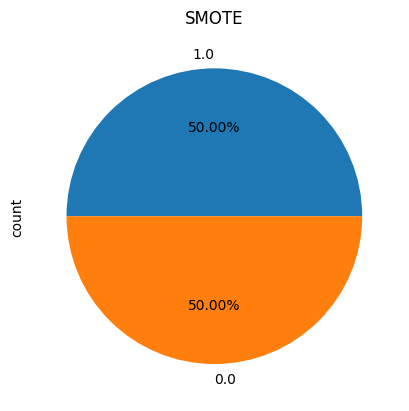

In [45]:
ax = y_train_smote.value_counts().plot.pie(autopct='%1.2f%%')
_ = ax.set_title("SMOTE")

In [46]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(400, 23)
(400,)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [48]:
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train on the SMOTE-applied training data
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [49]:
# Get list of feature names in the order used to train the model
feature_order = X_train_smote.columns.tolist()
print("Feature Order:", feature_order)

Feature Order: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [50]:
# Predict on test data
y_pred = rf_model.predict(X_test)

In [51]:
# Evaluate using classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



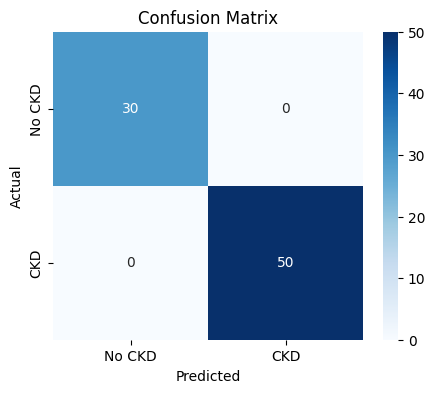

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
# TP = 50: 50 actual CKD patients correctly predicted as CKD.
# TN = 30: 30 actual non-CKD people correctly predicted as non-CKD.
# FP = 0: No non-CKD people wrongly predicted as CKD.
# FN = 0: No CKD patients were missed.
# y_test has 50 ckd patients and 30 not ckd.

In [54]:
# 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.975  0.9875 1.     1.     1.    ]
Mean CV Accuracy: 0.9925


In [55]:
import os
import pickle

# Define directory and file path for saving the model
models_dir = r'F:\vscode\Multiple Disease Prediction\models'
model_filename = 'rf_kidney_model.pkl'
model_path = os.path.join(models_dir, model_filename)

# Make sure directory exists
os.makedirs(models_dir, exist_ok=True)

# Save the trained model to file
with open(model_path, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Random Forest model saved successfully at: {model_path}")

Random Forest model saved successfully at: F:\vscode\Multiple Disease Prediction\models/rf_kidney_model.pkl
